In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
#from xgboost import XGBRegressor
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.shape

(284807, 31)

In [5]:
print (df['Class'].sum()*1.0 / df['Class'].count())*100 , '%'

0.172748563062 %


* very unbalanced sample. need to resample.

In [6]:
df.columns[1:29]

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28'],
      dtype='object')

In [7]:
for i in list(df.columns[1:29]) : 
    c = df[i].isnull().sum()
    if c > 0 : 
        print c
print 'Done'

Done


* No Null values for pca features

In [8]:
df['Amount'].isnull().sum()

0

# Data treatment - making balanced data

In [9]:
X = df.columns[1:29]
Y = 'Class'

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X], df[Y], test_size=0.2, random_state=0)

In [13]:
# Create from train set a new data set to obtain a balanced data set using SMOTE
oversampler=SMOTE(random_state=0)
X_train_os,Y_train_os = oversampler.fit_sample(X_train,Y_train)

In [22]:
# same number of data for each class  -  make balanced data
len(Y_train_os[Y_train_os == 0]), len(Y_train_os[Y_train_os == 1]), len(Y_train_os)

(227454, 227454, 454908)

# Testing Different models 

# Random Forest Classifier , logistic regression, Naive Bayes, Adaboost, SVM

In [38]:
# Random Forest Classifier : criterion = 'gini'/'entropy'
clf = RandomForestClassifier(criterion='entropy',random_state=0)

In [39]:
clf.fit(X_train_os,Y_train_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [40]:
# perform the prediction on test set
actual = Y_test
prediction = clf.predict(X_test)

In [41]:
# validation with confusion matrix
confusion_matrix(actual,prediction)

array([[56847,    14],
       [   18,    83]])

In [113]:
print accuracy_score(actual, prediction)
print roc_auc_score(actual, prediction)

0.999438221973
0.910767981883


In [47]:
print(metrics.classification_report(actual, prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.86      0.82      0.84       101

avg / total       1.00      1.00      1.00     56962



In [114]:
# ROC curve 
#Let's go further and use the roc_auc indicator
#see https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn for a quick introduction

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, prediction)
#print false_positive_rate, true_positive_rate, thresholds
roc_auc = auc(false_positive_rate, true_positive_rate)
print 'AUC = ', roc_auc

AUC =  0.910767981883


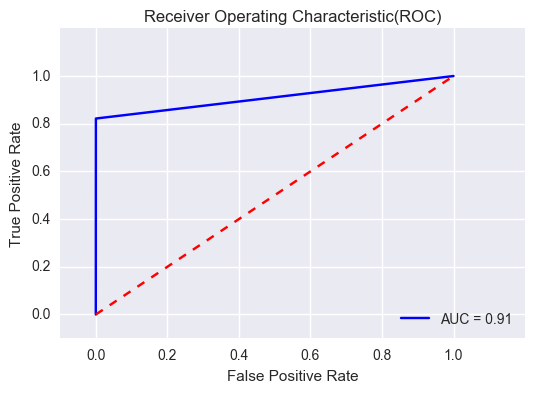

In [121]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
col = df.columns[1:29]
col 
importance = clf.feature_importances_
print list(zip(X_train[col], importance))
inx = np.argsort(importance)
print inx

[('V1', 0.018535120138570893), ('V2', 0.0096624094622328929), ('V3', 0.025635319474152984), ('V4', 0.049216261140504591), ('V5', 0.01174367180925375), ('V6', 0.0059236858933637074), ('V7', 0.011740532759974238), ('V8', 0.027999813250827961), ('V9', 0.038099729033452642), ('V10', 0.028642301602462679), ('V11', 0.12530320356354846), ('V12', 0.29591409033928179), ('V13', 0.011550384262808118), ('V14', 0.14065990139574153), ('V15', 0.0074371500548882103), ('V16', 0.0084053479789727419), ('V17', 0.088311772580153158), ('V18', 0.019231287032268625), ('V19', 0.011907371059050152), ('V20', 0.010472496862257605), ('V21', 0.0064721969136247214), ('V22', 0.0069306374676573468), ('V23', 0.0065992758390147205), ('V24', 0.0051291386317415325), ('V25', 0.0075758164535247351), ('V26', 0.006428263309627663), ('V27', 0.0069446870016835445), ('V28', 0.0075281346893590895)]
[23  5 25 20 22 21 26 14 27 24 15  1 19 12  6  4 18  0 17  2  7  9  8  3 16
 10 13 11]


In [72]:
importance[inx]

array([ 0.00512914,  0.00592369,  0.00642826,  0.0064722 ,  0.00659928,
        0.00693064,  0.00694469,  0.00743715,  0.00752813,  0.00757582,
        0.00840535,  0.00966241,  0.0104725 ,  0.01155038,  0.01174053,
        0.01174367,  0.01190737,  0.01853512,  0.01923129,  0.02563532,
        0.02799981,  0.0286423 ,  0.03809973,  0.04921626,  0.08831177,
        0.1253032 ,  0.1406599 ,  0.29591409])

In [75]:
nl = []
for i in inx : 
    i = i+1
    n = 'V'+str(i)
    nl.append(n)
    #print n

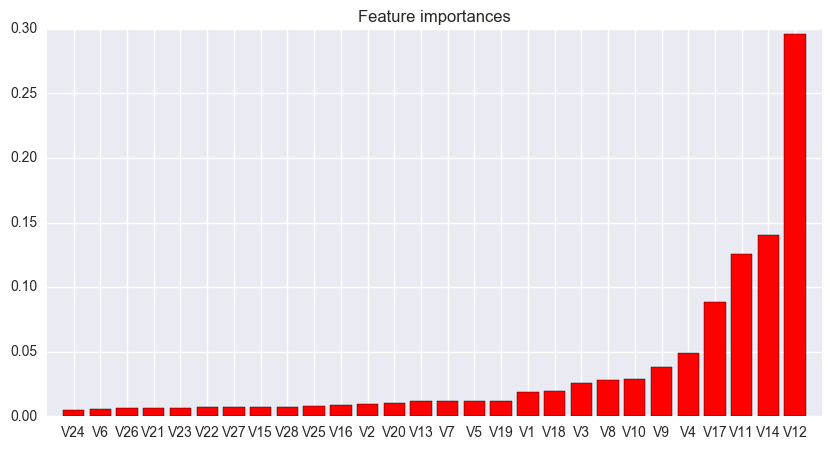

In [82]:
plt.figure()
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance[inx], color="r", align="center")
#plt.xticks(range(X_train.shape[1]), inx)
plt.xticks(range(X_train.shape[1]), nl)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Logistic Regression 

In [92]:
lr = linear_model.LogisticRegression(class_weight='balanced')
lr.fit(X_train_os, Y_train_os)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [94]:
# perform the prediction on test set
actual_lr = Y_test
prediction_lr = lr.predict(X_test)

In [130]:
fpr, tpr, thres_lr = metrics.roc_curve(actual_lr, prediction_lr, pos_label=True)
print("ROCAUC:", roc_auc_score(actual_lr, prediction_lr))
print(confusion_matrix(actual_lr, prediction_lr))
#confusion_matrix(actual_lr, prediction_lr)
roc_auc_lr = auc(fpr, tpr)
print roc_auc_lr
print accuracy_score(actual_lr, prediction_lr)

('ROCAUC:', 0.95788957995709878)
[[55450  1411]
 [    6    95]]
0.957889579957
0.975123766722


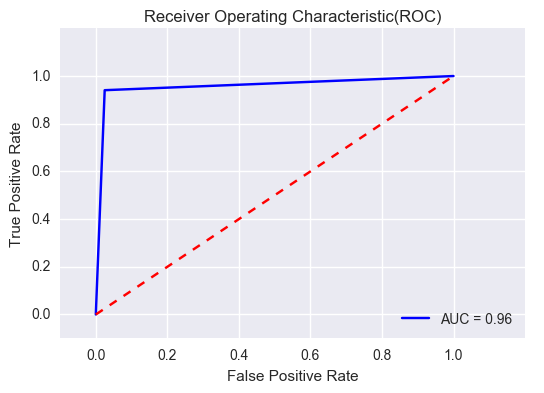

In [131]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc_lr)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

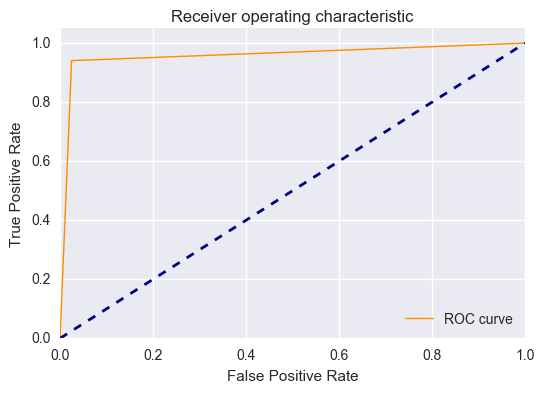

In [118]:
plt.plot(fpr, tpr, color='darkorange',lw=1, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()

# Adaboost 

In [122]:
clf_ab = AdaBoostClassifier(random_state=0)
clf_ab.fit(X_train_os, Y_train_os)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

In [123]:
# perform the prediction on test set
actual_clf_ab = Y_test
prediction_clf_ab = clf_ab.predict(X_test)

In [128]:
fpr_ab, tpr_ab, thres_ab = metrics.roc_curve(actual_clf_ab, prediction_clf_ab, pos_label=True)
print("ROCAUC:", roc_auc_score(actual_clf_ab, prediction_clf_ab))
print(confusion_matrix(actual_clf_ab, prediction_clf_ab))
#roc_auc_ab = auc(actual_clf_ab, prediction_clf_ab)
#print auc(actual_clf_ab, prediction_clf_ab)
print accuracy_score(actual_clf_ab, prediction_clf_ab)

('ROCAUC:', 0.93964402683563408)
[[55627  1234]
 [   10    91]]
0.978160879183


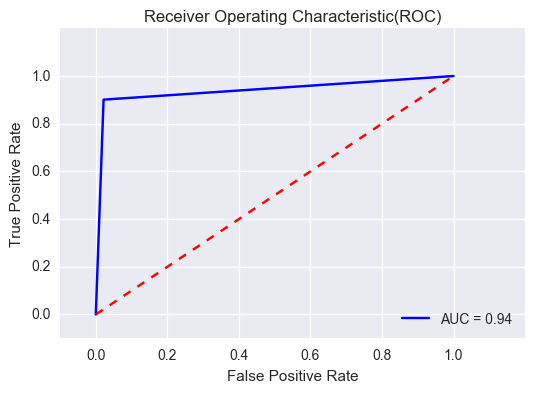

In [129]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr_ab, tpr_ab, 'b', label='AUC = %0.2f'% roc_auc_score(actual_clf_ab, prediction_clf_ab))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes

In [132]:
gnb = GaussianNB()
gnb.fit(X_train_os, Y_train_os)

GaussianNB(priors=None)

In [133]:
# perform the prediction on test set
actual_nb = Y_test
prediction_nb = gnb.predict(X_test)

In [136]:
fpr_nb, tpr_nb, thres_nb = metrics.roc_curve(actual_nb, prediction_nb, pos_label=True)
print("ROCAUC:", roc_auc_score(actual_nb, prediction_nb))
print(confusion_matrix(actual_nb, prediction_nb))
#roc_auc_ab = auc(actual_nb, prediction_nb)
#print auc(actual_nb, prediction_nb)
print accuracy_score(actual_nb, prediction_nb)

('ROCAUC:', 0.92818660966006905)
[[55450  1411]
 [   12    89]]
0.975018433342


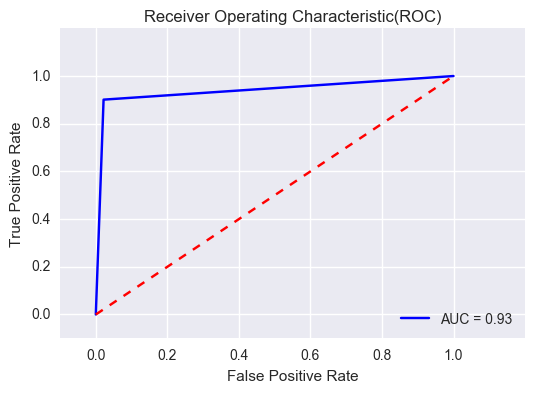

In [137]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr_ab, tpr_ab, 'b', label='AUC = %0.2f'% roc_auc_score(actual_nb, prediction_nb))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM

In [139]:
# SVC with 'linar' kernel. It took about 10 mins.
svm = SVC(kernel='linear')
svm.fit(X_train_os, Y_train_os)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
# make prediction and check accuracy
actual_svm = Y_test
prediction_svm = svm.predict(X_test)
print(metrics.confusion_matrix(actual_svm,prediction_svm))
print(metrics.classification_report(actual_svm,prediction_svm))
print('Accuracy : %f' %(metrics.accuracy_score(actual_svm,prediction_svm)))
print('Area under the curve : %f' %(metrics.roc_auc_score(actual_svm,prediction_svm)))

[[55790  1071]
 [    7    94]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     56861
          1       0.08      0.93      0.15       101

avg / total       1.00      0.98      0.99     56962

Accuracy : 0.981075
Area under the curve : 0.955929


In [141]:
# SVC with 'sigmoid' kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_os, Y_train_os)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
actual_svm_sigmoid = Y_test
prediction_svm_sigmoid = svm_sigmoid.predict(X_test)
print(metrics.confusion_matrix(actual_svm_sigmoid,prediction_svm_sigmoid))
print(metrics.classification_report(actual_svm_sigmoid,prediction_svm_sigmoid))
print('Accuracy : %f' %(metrics.accuracy_score(actual_svm_sigmoid,prediction_svm_sigmoid)))
print('Area under the curve : %f' %(metrics.roc_auc_score(actual_svm_sigmoid,prediction_svm_sigmoid)))